In [1]:
!pip install nbconvert

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, minmax_scale, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
astro = pd.read_csv("E:/Python Programs/Astro_EuroMillions.csv")
astro.head()

,Data,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star
0,Train,Tuesday,Ashwini,NaN,NaN,NaN,3.0,7,15,18,46,49,10,12
1,Train,Tuesday,Bharani,NaN,NaN,NaN,NaN,7,15,18,46,49,10,12
2,Train,Tuesday,Krittika,NaN,NaN,NaN,NaN,7,15,18,46,49,10,12
3,Train,Tuesday,Rohini,NaN,NaN,NaN,NaN,7,15,18,46,49,10,12
4,Train,Tuesday,Mrigashirsha,NaN,NaN,NaN,NaN,7,15,18,46,49,10,12


In [4]:
astro.isna().sum()

Data                 0
Day                  0
Nakshatra            0
Pada-1            1639
Pada-2            1591
Pada-3            1637
Pada-4            1616
1st Num              0
2nd Num              0
3rd Num              0
4th Num              0
5th Num              0
1st Lucky Star       0
2nd Lucky Star       0
dtype: int64

In [5]:
astro.fillna(value={"Pada-1":0, "Pada-2":0, "Pada-3":0, "Pada-4":0},inplace=True)

In [6]:
astro.isna().sum()

Data              0
Day               0
Nakshatra         0
Pada-1            0
Pada-2            0
Pada-3            0
Pada-4            0
1st Num           0
2nd Num           0
3rd Num           0
4th Num           0
5th Num           0
1st Lucky Star    0
2nd Lucky Star    0
dtype: int64

In [7]:
astro.head()

,Data,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star
0,Train,Tuesday,Ashwini,0.0,0.0,0.0,3.0,7,15,18,46,49,10,12
1,Train,Tuesday,Bharani,0.0,0.0,0.0,0.0,7,15,18,46,49,10,12
2,Train,Tuesday,Krittika,0.0,0.0,0.0,0.0,7,15,18,46,49,10,12
3,Train,Tuesday,Rohini,0.0,0.0,0.0,0.0,7,15,18,46,49,10,12
4,Train,Tuesday,Mrigashirsha,0.0,0.0,0.0,0.0,7,15,18,46,49,10,12


In [8]:
astro["Pada-1"] = astro["Pada-1"].astype(dtype='int32')
astro["Pada-2"] = astro["Pada-2"].astype(dtype='int32')
astro["Pada-3"] = astro["Pada-3"].astype(dtype='int32')
astro["Pada-4"] = astro["Pada-4"].astype(dtype='int32')

In [9]:
encoding = LabelEncoder()
astro["Day"] = encoding.fit_transform(astro["Day"])
astro["Nakshatra"] = encoding.fit_transform(astro["Nakshatra"])

In [10]:
astro.head()

,Data,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star
0,Train,1,3,0,0,0,3,7,15,18,46,49,10,12
1,Train,1,4,0,0,0,0,7,15,18,46,49,10,12
2,Train,1,9,0,0,0,0,7,15,18,46,49,10,12
3,Train,1,19,0,0,0,0,7,15,18,46,49,10,12
4,Train,1,11,0,0,0,0,7,15,18,46,49,10,12


In [11]:
# 1 means Tuesday, 0 means Friday

astro.Day.value_counts()

Day
1    883
0    883
Name: count, dtype: int64

In [12]:
astro.Nakshatra.value_counts()

Nakshatra
18    73
9     69
11    68
20    68
19    67
21    67
15    66
6     66
7     66
1     65
10    65
14    65
12    65
8     64
24    64
23    64
3     64
0     64
26    64
22    64
4     64
25    64
16    64
2     64
17    64
13    64
5     64
Name: count, dtype: int64

In [13]:
astro_train = astro[astro['Data'] == 'Train']
astro_test = astro[astro['Data'] == 'Test']

In [14]:
astro_train.shape, astro_test.shape

((1130, 14), (636, 14))

In [15]:
astro_train.head()

,Data,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star
0,Train,1,3,0,0,0,3,7,15,18,46,49,10,12
1,Train,1,4,0,0,0,0,7,15,18,46,49,10,12
2,Train,1,9,0,0,0,0,7,15,18,46,49,10,12
3,Train,1,19,0,0,0,0,7,15,18,46,49,10,12
4,Train,1,11,0,0,0,0,7,15,18,46,49,10,12


In [16]:
X_train = astro_train.loc[:,"Day":"Pada-4"]
y_train_1 = astro_train["1st Num"]
y_train_2 = astro_train["2nd Num"]
y_train_3 = astro_train["3rd Num"]
y_train_4 = astro_train["4th Num"]
y_train_5 = astro_train["5th Num"]
y_train_Lucky1 = astro_train["1st Lucky Star"]
y_train_Lucky2 = astro_train["2nd Lucky Star"]

In [17]:
X_train.head()

,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4
0,1,3,0,0,0,3
1,1,4,0,0,0,0
2,1,9,0,0,0,0
3,1,19,0,0,0,0
4,1,11,0,0,0,0


In [18]:
astro_test.head()

,Data,Day,Nakshatra,Pada-1,Pada-2,Pada-3,Pada-4,1st Num,2nd Num,3rd Num,4th Num,5th Num,1st Lucky Star,2nd Lucky Star
966,Test,0,3,0,0,0,6,6,9,10,30,49,3,4
967,Test,0,4,0,1,0,0,6,9,10,30,49,3,4
968,Test,0,9,0,3,0,0,6,9,10,30,49,3,4
969,Test,0,19,0,0,0,0,6,9,10,30,49,3,4
970,Test,0,11,0,0,0,0,6,9,10,30,49,3,4


In [19]:
X_test = astro_test.loc[:,"Day":"Pada-4"]
y_test_1 = astro_test["1st Num"]
y_test_2 = astro_test["2nd Num"]
y_test_3 = astro_test["3rd Num"]
y_test_4 = astro_test["4th Num"]
y_test_5 = astro_test["5th Num"]
y_test_Lucky1 = astro_test["1st Lucky Star"]
y_test_Lucky2 = astro_test["2nd Lucky Star"]

In [20]:
X_train.shape, X_test.shape

((1130, 6), (636, 6))

In [21]:
y_train_1.shape, y_test_1.shape

((1130,), (636,))

In [22]:
y_test_1

966     6
967     6
968     6
969     6
970     6
       ..
1706    5
1707    5
1708    5
1709    5
1710    5
Name: 1st Num, Length: 636, dtype: int64

In [23]:
model_dt_train1 = DecisionTreeClassifier(criterion="entropy", max_depth=5, max_leaf_nodes=5)
model_dt_train1.fit(X_train, y_train_1)
model_dt_train1.score(X_train, y_train_1), model_dt_train1.score(X_test, y_test_1)

(0.20088495575221238, 0.1320754716981132)

In [24]:
model_dt_train1.get_depth(), model_dt_train1.get_n_leaves()

(4, 5)

In [25]:
model_dt_train1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [26]:
y_predict_dt1 = model_dt_train1.predict(X_test)
y_predict_dt1

array([ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  2,  2, 13,  8,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2, 12,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8, 12,  8,  8,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  8,  8,  2,  2,  8,  8,  8,  8,  8,
        8,  8,  8,  2,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8, 12,
        8,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  8, 12,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8, 12,  8,  8,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  8,  8, 12,  8

In [27]:
y_test_1.values

array([ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6, 35, 35, 35, 35, 35, 35,
       35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35,
       35, 35, 35, 35, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16,  4,  4,  4,  4

In [28]:
np.sum(y_predict_dt1==y_test_1)

84

In [29]:
accuracy_score(y_test_1, y_predict_dt1)

0.1320754716981132

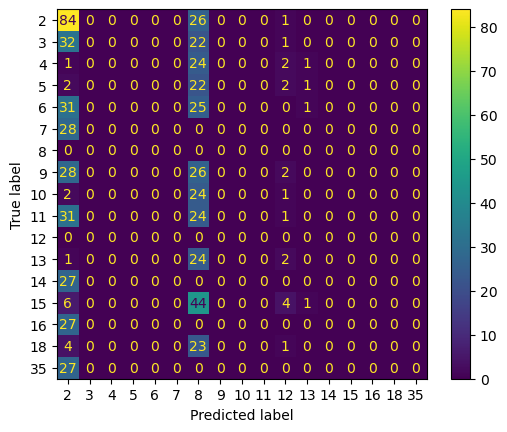

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test_1, y_predict_dt1)
plt.show()

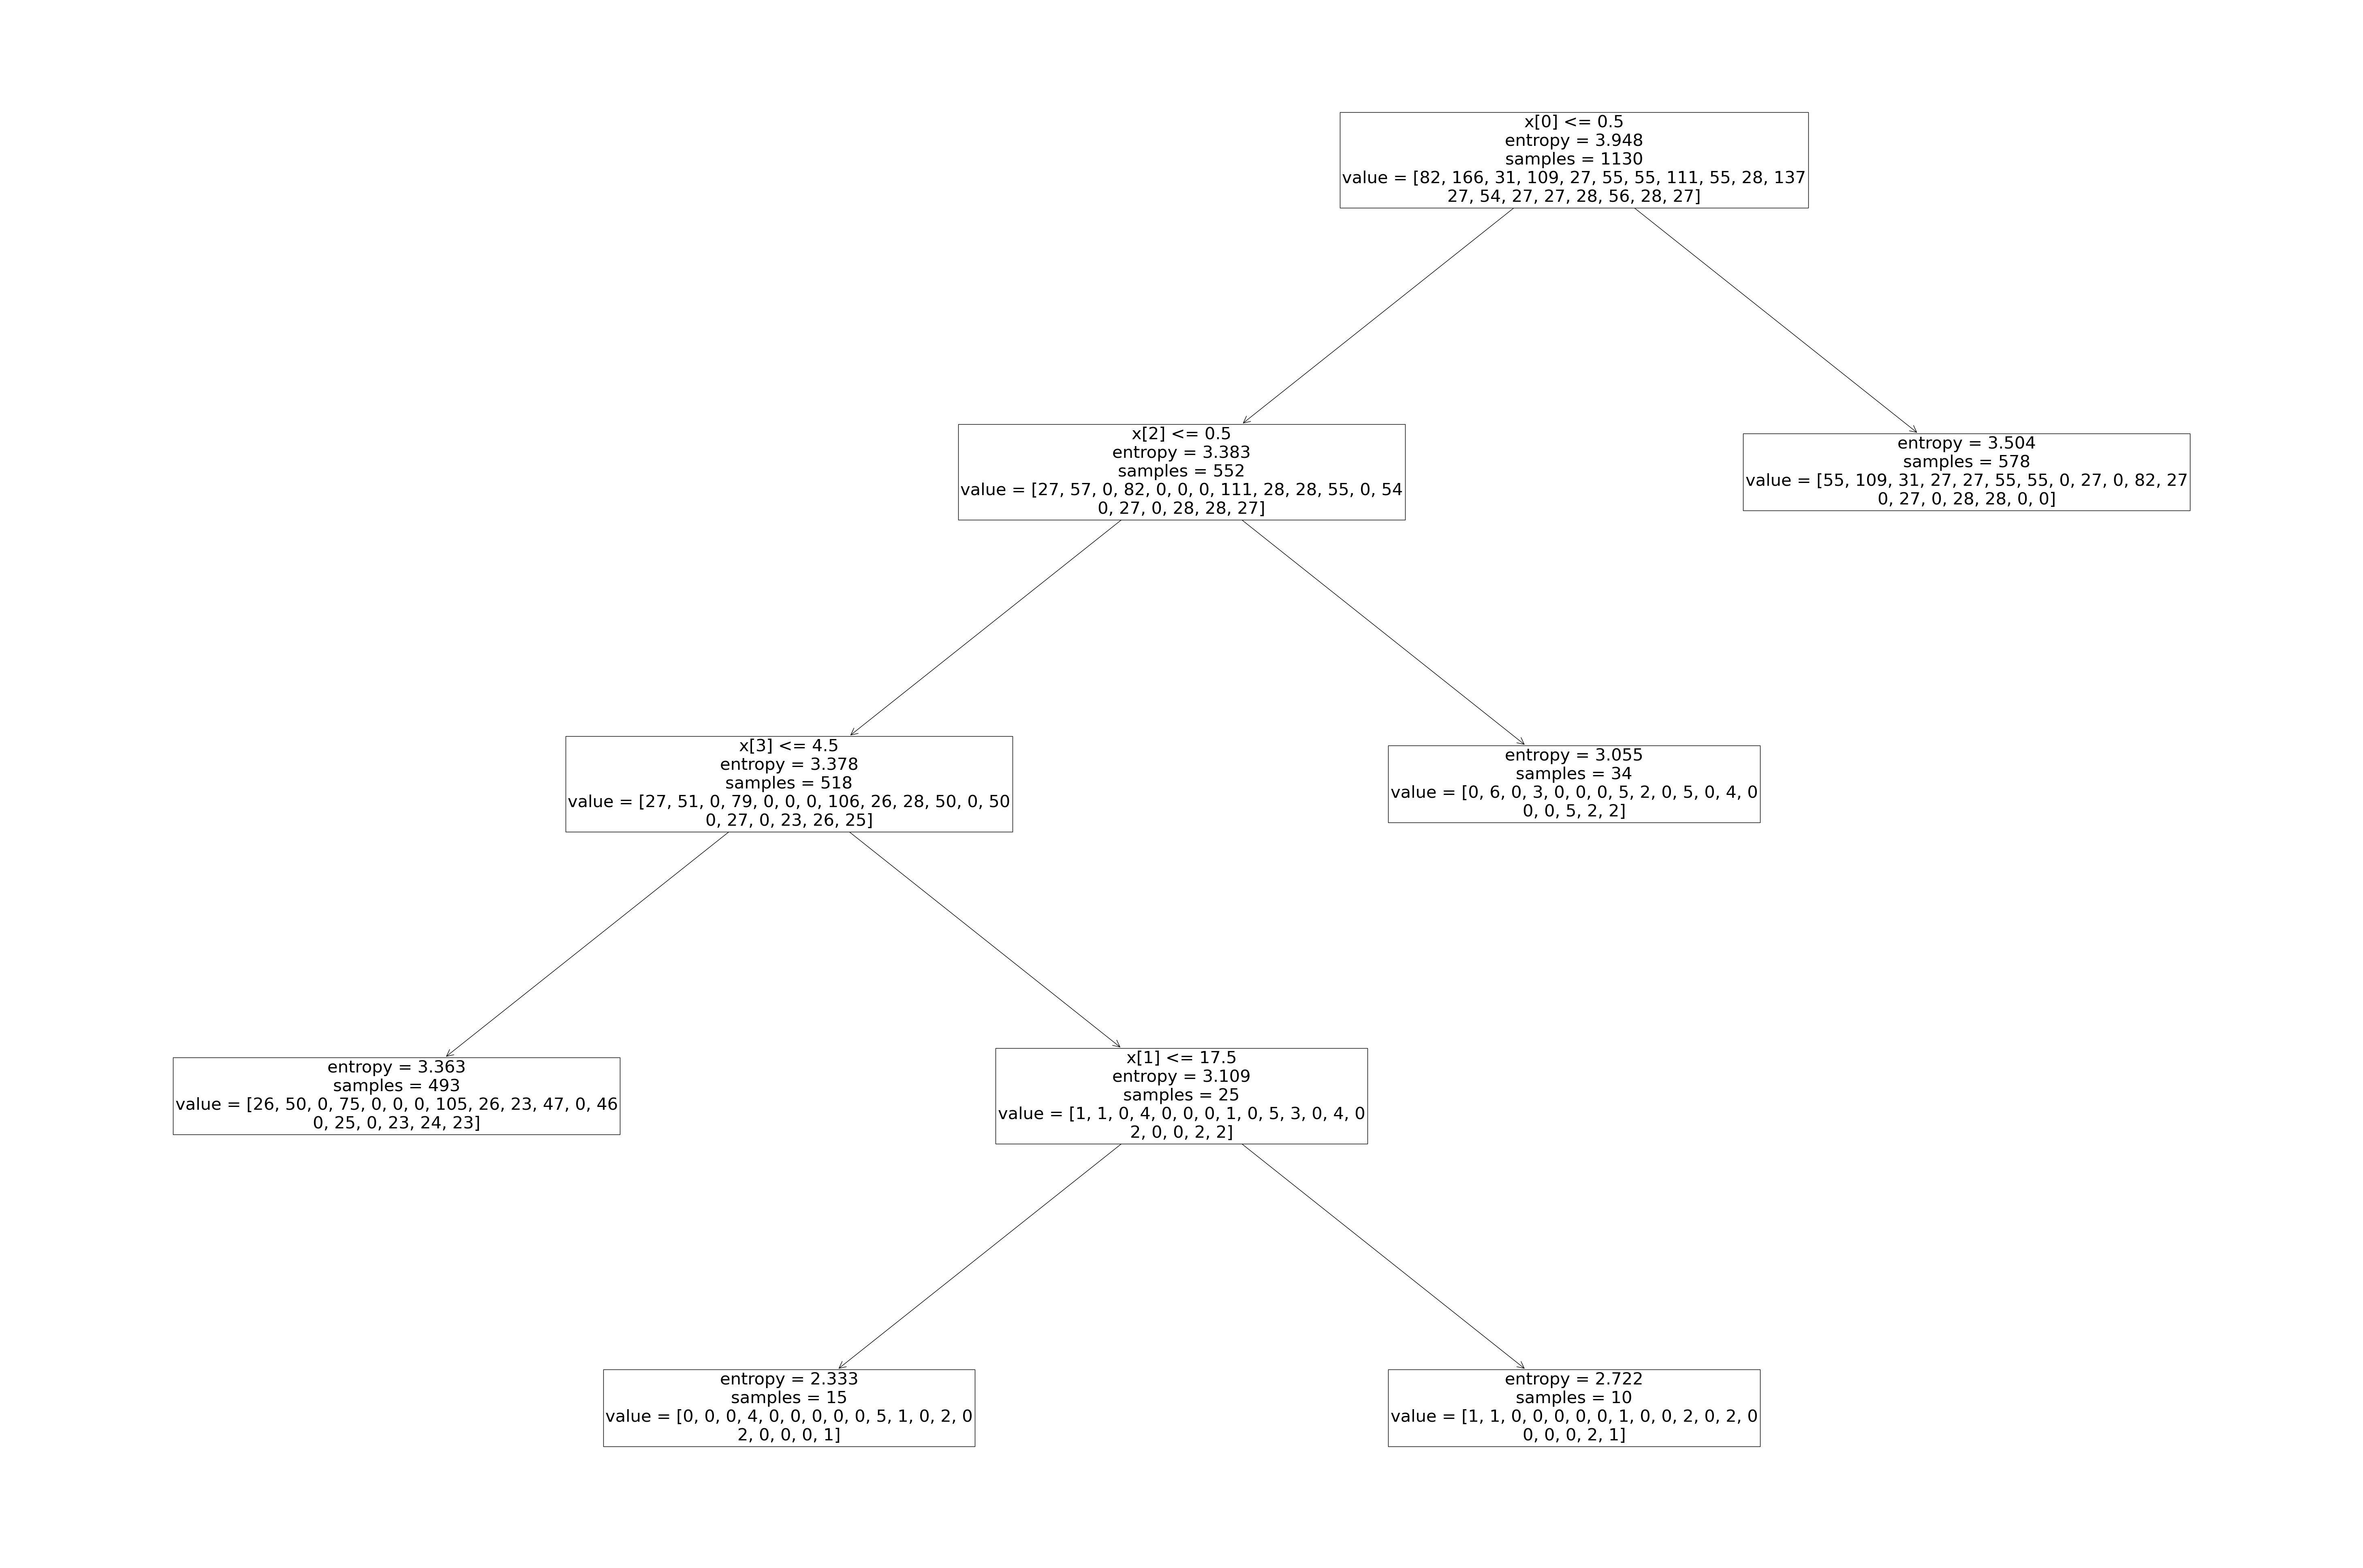

In [31]:
plt.figure(figsize=[75,50])
plot_tree(decision_tree=model_dt_train1, fontsize=30)
plt.show()

In [32]:
model_dt_train2 = DecisionTreeClassifier(criterion="entropy", max_depth=15, max_leaf_nodes=120)
model_dt_train2.fit(X_train, y_train_2)
model_dt_train2.score(X_train, y_train_2), model_dt_train2.score(X_test, y_test_2)

(0.25663716814159293, 0.012578616352201259)

In [33]:
model_dt_train2.get_depth(), model_dt_train2.get_n_leaves()

(15, 120)

In [34]:
model_dt_train3 = DecisionTreeClassifier(criterion="entropy", splitter='random', max_depth=13, max_leaf_nodes=100, min_samples_split=20)
model_dt_train3.fit(X_train, y_train_3)
model_dt_train3.score(X_train, y_train_3), model_dt_train3.score(X_test, y_test_3)

(0.17079646017699116, 0.007861635220125786)

In [35]:
model_dt_train3.get_depth(), model_dt_train3.get_n_leaves()

(13, 39)

In [36]:
model_dt_train4 = DecisionTreeClassifier(criterion="entropy", max_depth=15, max_leaf_nodes=30, min_samples_split=40)
model_dt_train4.fit(X_train, y_train_4)
model_dt_train4.score(X_train, y_train_4), model_dt_train4.score(X_test, y_test_4)

(0.13097345132743363, 0.0047169811320754715)

In [37]:
model_dt_train4.get_depth(), model_dt_train4.get_n_leaves()

(15, 30)

In [38]:
model_knn_train1 = KNeighborsClassifier(n_neighbors=115, weights="uniform", p=2, leaf_size=50, algorithm='brute')
model_knn_train1.fit(X_train, y_train_1)
y_predict_knn1 = model_knn_train1.predict(X_test)
accuracy_score(y_test_1, y_predict_knn1)

0.1540880503144654

In [39]:
model_knn_train2 = KNeighborsClassifier(n_neighbors=6, weights='distance', p=1)
model_knn_train2.fit(X_train, y_train_2)
y_predict_knn2 = model_knn_train2.predict(X_test)
accuracy_score(y_test_2, y_predict_knn2)

0.10377358490566038

In [40]:
model_knn_train3 = KNeighborsClassifier(n_neighbors=105, weights='uniform', p=2, algorithm='auto', leaf_size=101)
model_knn_train3.fit(X_train, y_train_3)
y_predict_knn3 = model_knn_train3.predict(X_test)
accuracy_score(y_test_3, y_predict_knn3)

0.08647798742138364

In [41]:
model_knn_train4 = KNeighborsClassifier(n_neighbors=3, weights='uniform', p=2, algorithm='ball_tree', leaf_size=101)
model_knn_train4.fit(X_train, y_train_4)
y_predict_knn4 = model_knn_train4.predict(X_test)
accuracy_score(y_test_4, y_predict_knn4)

0.029874213836477988

In [42]:
model_knn_train5 = KNeighborsClassifier(n_neighbors=353, weights="uniform", p=1, algorithm='ball_tree', leaf_size=20)
model_knn_train5.fit(X_train, y_train_5)
model_knn_train5.score(X_test, y_test_5)

0.09119496855345911

In [43]:
model_knn_train_lucky1 = KNeighborsClassifier(n_neighbors=267, weights="uniform", p=1, leaf_size=50, algorithm='auto')
model_knn_train_lucky1.fit(X_train, y_train_Lucky1)
model_knn_train_lucky1.score(X_test, y_test_Lucky1)

0.05345911949685535

In [44]:
accuracy_distance_train_lucky1 = []
for k in range(1,300,2):
    model_knn_train_lucky1 = KNeighborsClassifier(n_neighbors=k, weights="uniform", p=1, leaf_size=50, algorithm='auto')
    model_knn_train_lucky1.fit(X_train, y_train_Lucky1)
    accuracy_distance_train_lucky1.append(model_knn_train_lucky1.score(X_test, y_test_Lucky1))

accuracy_distance_train_lucky1 = np.array(accuracy_distance_train_lucky1)
print(accuracy_distance_train_lucky1)
print(np.max(accuracy_distance_train_lucky1))

[0.08333333 0.16666667 0.10849057 0.12578616 0.1336478  0.12735849
 0.12578616 0.1572327  0.17924528 0.14150943 0.14779874 0.12893082
 0.15408805 0.1509434  0.15251572 0.16666667 0.15880503 0.17295597
 0.16352201 0.15408805 0.15880503 0.1572327  0.17138365 0.14308176
 0.16037736 0.17138365 0.16666667 0.17295597 0.13836478 0.13679245
 0.14150943 0.12578616 0.1336478  0.13207547 0.10849057 0.11320755
 0.11163522 0.11949686 0.10691824 0.12578616 0.1163522  0.11792453
 0.13207547 0.1336478  0.12893082 0.13050314 0.11949686 0.11792453
 0.1509434  0.14308176 0.14465409 0.12106918 0.12264151 0.11477987
 0.11949686 0.12893082 0.10691824 0.1163522  0.1163522  0.10849057
 0.11006289 0.10849057 0.10691824 0.10377358 0.10534591 0.10062893
 0.09119497 0.08176101 0.07861635 0.08018868 0.07861635 0.07861635
 0.07704403 0.07075472 0.07704403 0.07232704 0.07389937 0.07389937
 0.06761006 0.0754717  0.06918239 0.08176101 0.06446541 0.07389937
 0.07861635 0.08805031 0.08490566 0.08333333 0.08647799 0.0660

In [45]:
np.where(accuracy_distance_train_lucky1==0.3206831119544592)
accuracy_distance_train_lucky1[133]

0.05345911949685535

In [46]:
accuracy_distance = []
for k in range(1,500,2):
    model_knn_train5 = KNeighborsClassifier(n_neighbors=k, weights="uniform", p=1, algorithm='ball_tree', leaf_size=20)
    model_knn_train5.fit(X_train, y_train_5)
    accuracy_distance.append((k, model_knn_train5.score(X_test, y_test_5)))

print(accuracy_distance)

[(1, 0.05660377358490566), (3, 0.031446540880503145), (5, 0.03930817610062893), (7, 0.05188679245283019), (9, 0.059748427672955975), (11, 0.055031446540880505), (13, 0.06761006289308176), (15, 0.06289308176100629), (17, 0.06289308176100629), (19, 0.05345911949685535), (21, 0.05817610062893082), (23, 0.059748427672955975), (25, 0.06918238993710692), (27, 0.05345911949685535), (29, 0.06289308176100629), (31, 0.06918238993710692), (33, 0.07075471698113207), (35, 0.059748427672955975), (37, 0.06289308176100629), (39, 0.055031446540880505), (41, 0.0660377358490566), (43, 0.06132075471698113), (45, 0.06761006289308176), (47, 0.06918238993710692), (49, 0.07861635220125786), (51, 0.07861635220125786), (53, 0.07075471698113207), (55, 0.0770440251572327), (57, 0.07547169811320754), (59, 0.07861635220125786), (61, 0.06918238993710692), (63, 0.06918238993710692), (65, 0.06918238993710692), (67, 0.06761006289308176), (69, 0.07389937106918239), (71, 0.07547169811320754), (73, 0.06761006289308176), (

In [47]:
ab = np.array([(0,10), (22,10), (13,15)])
print(np.where(ab==15))
np.max(ab[1])

(array([2], dtype=int64), array([1], dtype=int64))


22